In [1]:
import pylab as plt
%matplotlib inline
np = plt.np
import os
import seaborn as sns

import collections
from misc import dotdict
import sys
import pandas as pd

ppp = []

In [2]:
def add_maxlabels(p, bplt, colname='solvetime'):
    mx_val = {}
    for i, lbl in enumerate(sorted(set(p.puzzlename))):
        mx_val[i+1.0] = np.max(p[colname][p.puzzlename==lbl])

    import collections

    h = collections.defaultdict(lambda:-np.inf)
    l = collections.defaultdict(lambda: np.inf)

    for i in bplt.get_lines():
        yy, xx = (i.get_ydata(),
                  i.get_xdata())
        msk = xx==np.round(xx)

        for y, x in zip(yy[msk], xx[msk]):            
            if h[x] < y:
                h[x] = y

            if l[x] > y:
                l[x] = y
    lgt = {}
    for i in h:
        lgt[i] = h[i] - l[i]

    label_delt = np.mean(list(lgt.values()))*0.05

    for x, y in h.items():
        bplt.text(x, y+label_delt, '↑%.2f'%mx_val[x], horizontalalignment='center')
        

In [3]:
def last_float(line):
    line = line.replace('s',' ').replace(':',' ')
    for i in line.split()[::-1]:
        try:
            return float(i)
        except: pass



In [4]:
#########################################
# Streicher paper
#########################################

streicher_paper = np.array([0.02886406, 0.10465549, 0.03612663, 0.03556797, 0.06294227,
       0.0198324 , 0.05772812, 0.04599628, 0.05716946, 0.03631285,
       0.03519553, 0.0452514 , 0.05046555, 0.0707635 , 0.0179702 ,
       0.03091248, 0.06582868, 0.01918063, 0.03687151, 0.03594041,
       0.05651769, 0.04860335, 0.0113594 , 0.01908752, 0.01098696,
       0.00968343, 0.02337058, 0.00577281, 0.02085661, 0.0122905 ,
       0.01564246, 0.02309125, 0.01685289, 0.05605214, 0.0094041 ,
       0.02523277, 0.03072626, 0.02765363, 0.00670391, 0.00577281,
       0.03091248, 0.0264432 , 0.03715084, 0.06461825, 0.01564246,
       0.02197393, 0.01564246, 0.01256983, 0.01648045, 0.01927374,
       0.03407821, 0.07402235, 0.00996276, 0.02439479, 0.05791434,
       0.02197393, 0.04348231, 0.02104283, 0.00633147, 0.01284916,
       0.0141527 , 0.00949721, 0.03035382, 0.00744879, 0.00707635,
       0.00670391, 0.00502793, 0.02867784, 0.0273743 , 0.00595903,
       0.00893855, 0.00214153, 0.03240223, 0.02374302, 0.00968343,
       0.00521415, 0.00679702, 0.05549348, 0.00819367, 0.01024209,
       0.00837989, 0.0150838 , 0.00689013, 0.01685289, 0.01201117,
       0.01042831, 0.00409683, 0.00800745, 0.00391061, 0.00651769,
       0.00931099, 0.00595903, 0.02020484, 0.01378026, 0.02364991])

vals = {}#dotdict()
for i, v in enumerate(streicher_paper):
    vals[i] = dict( solvetime=v,
                    puzzlename='streicher_dataset'
                   )
    
        
p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
ppp.append(p)

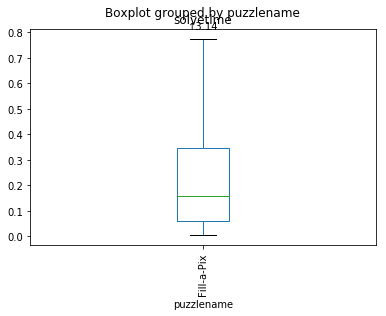

In [5]:

############################################33333
# Fill-a-pix
############################################33333

f = open('output/fillapix_purgeandmerge.txt')

vals = collections.OrderedDict()

capture=np.inf
key = -1
for ii in range(sys.maxsize):
    line = f.readline()
    if not line: break

    #line = line.replace('Error tot time', 'Elapsed time: ')

    if "File" in line:
        key += 1
        vals[key] = dotdict()
        vals[key].filename = line.split()[-1]
        vals[key].max_fsize = -np.inf

    if not vals: continue
        
    if 'reduction' in line:
        vals[key].max_fsize = np.max([vals[key].max_fsize]+[int(i.split(',')[0]) for i in line.split(':')[2:]])

    if not 'errtime' in vals[key]:
        vals[key].errtime = np.nan
    if 'err' in line and 'time' in line:
        vals[key].errtime = last_float(line)

    
    if 'Elapsed time' in line:
        vals[key].solvetime = last_float(line)

p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
p['puzzlename'] = ['Fill-a-Pix' for i in p.iterrows()]


ppp.append(p)
bplt = p.boxplot(by ='puzzlename', column =['solvetime'], grid=False, showfliers=False,  rot=90)
add_maxlabels(p, bplt)
plt.savefig("output/figs/fillapix.svg", format="svg")


In [6]:
############################################33333
# Calcudoku
############################################33333


f = open('output/calcudoku_purgeandmerge.txt')

vals = collections.OrderedDict()

capture=np.inf
key = -1
for ii in range(sys.maxsize):
    line = f.readline()
    if not line: break

    #line = line.replace('Error tot time', 'Elapsed time: ')

    if "File" in line:
        key += 1
        vals[key] = dotdict()
        vals[key].filename = line.split()[-1]
        vals[key].max_fsize = -np.inf
        vals[key].solvetime = None

    if not vals: continue
    
    if 'reduction' in line:
        vals[key].max_fsize = np.max([vals[key].max_fsize]+[int(i.split(',')[0]) for i in line.split(':')[2:]])

    if not 'errtime' in vals[key]:
        vals[key].errtime = np.nan
    if 'err' in line and 'time' in line:
        vals[key].errtime = last_float(line)

    if 'Elapsed time' in line:
        vals[key].solvetime = last_float(line)
        
    if 'FINISHED CPU' in line:
        vals[key].MEM = int(line.split('MAXMEM')[1].split()[0].strip())
        vals[key].CPU = float(line.split('CPU')[1].split()[0].strip())
        

p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
p['puzzlename'] = ['Calcudoku' for i in p.iterrows()]

#fluke value
p = p[p.index!=p.solvetime.idxmax()]

ppp.append(p)


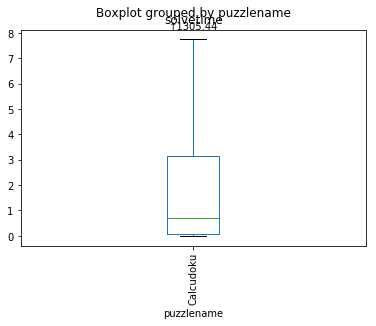

In [7]:
bplt = p.boxplot(by ='puzzlename', column =['solvetime'], grid=False, showfliers=False,  rot=90)
add_maxlabels(p, bplt)
plt.savefig("output/figs/calcudoku.svg", format="svg")

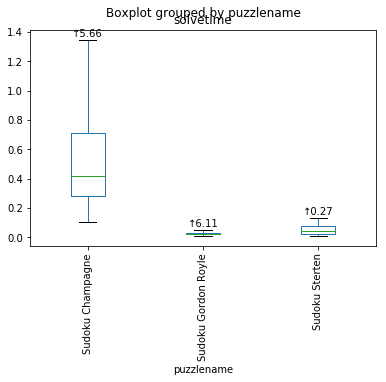

In [8]:
############################################33333
# Sudoku sterten
############################################33333
pp =[]
for ii, name in enumerate(['Sterten', 'Sterten', 'Champagne', "Gordon Royle"]):

    f = open('output/sudoku-'+name.lower().replace(' ','-')+'_purgeandmerge.txt')

    vals = collections.OrderedDict()

    capture=np.inf
    key = -1
    for i in range(sys.maxsize):
        line = f.readline()
        if not line: break

        #line = line.replace('Error tot time', 'Elapsed time: ')

        if "File" in line:
            key += 1
            vals[key] = dotdict()
            vals[key].filename = line.split()[-1]
            vals[key].max_fsize = -np.inf

        if not vals: continue

        if 'reduction' in line:
            vals[key].max_fsize = np.max([vals[key].max_fsize]+[int(i.split(',')[0]) for i in line.split(':')[2:]])

        if not 'errtime' in vals[key]:
            vals[key].errtime = np.nan
        if 'err' in line and 'time' in line:
            vals[key].errtime = last_float(line)

        if 'Elapsed time' in line:
            vals[key].solvetime = last_float(line)

    p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
    p['puzzlename'] = ["Sudoku "+name for i in p.iterrows()]
    
    pp.append(p)

p = pd.concat(pp, ignore_index=True)

ppp.append(p)
bplt = p.boxplot(by ='puzzlename', column =['solvetime'], grid=False, showfliers=False,  rot=90)
add_maxlabels(p, bplt)

plt.savefig("output/figs/sudoku.svg", format="svg")

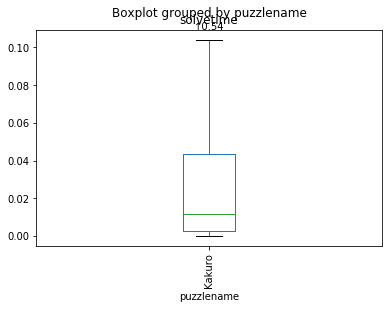

In [9]:
############################################33333
# Kakuro
############################################33333
'''
arr = np.array([float(i.split(':')[1].split('\n')[0].strip()) for i in str_in.split('\n') if 'Elapsed time:' in i])
arr = np.array([last_float(i) for i in str_in.split('\n') if 'solution' in i])
plt.plot(arr)
'''

f = open('output/kakuro_purgeandmerge.txt')

vals = collections.OrderedDict()

capture=np.inf
for i in range(sys.maxsize):
    line = f.readline()
    if not line: break
        
    if "File" in line:
        key = line.split('.net-')[1].split('.')[0]
        vals[key] = dotdict()
        vals[key].filename = line.split()[-1]
        vals[key].max_fsize = -np.inf

    if not vals: continue
        
    if 'reduction' in line:
        vals[key].max_fsize = np.max([vals[key].max_fsize]+[int(i.split(',')[0]) for i in line.split(':')[2:]])
    
    if not 'errtime' in vals[key]:
        vals[key].errtime = np.nan
    if 'err' in line and 'time' in line:
        vals[key].errtime = last_float(line)
       
    if 'Elapsed time' in line:
        vals[key].solvetime = last_float(line)
    
p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
p['puzzlename'] = ['Kakuro' for i in p.iterrows()]

ppp.append(p)
bplt = p.boxplot(by ='puzzlename', column =['solvetime'], grid=False, showfliers=False,  rot=90)
add_maxlabels(p, bplt)


'''
ptmp = p.copy()
ptmp['puzzlename'] = ['Calcudoku SPACEHOLDER' for i in ptmp.iterrows()]
ptmp['solvetime']*=30
ppp.append(ptmp)
'''

plt.savefig("output/figs/kakuro.svg", format="svg")

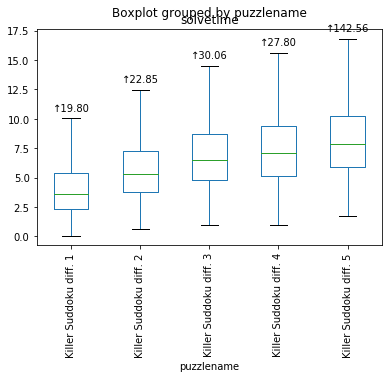

In [10]:
############################################33333
# Killer sudoku
############################################33333
        
f = open('output/killersudoku-krazydad-collection--emdw')


vals = collections.OrderedDict()

capture=np.inf
for i in range(sys.maxsize):
    line = f.readline()
    if not line: break
        
    if "File" in line:
        key = line.split('emdw/')[1].split('.')[0]
        vals[key] = dotdict()
        vals[key].filename = line.split()[-1]
        vals[key].difficulty = int(line.split('diff')[1].split('/')[0])
        vals[key].max_fsize = -np.inf

    if not vals: continue
        
    if 'reduction' in line:
        vals[key].max_fsize = np.max([vals[key].max_fsize]+[int(i.split(',')[0]) for i in line.split(':')[2:]])
    
    if not 'errtime' in vals[key]:
        vals[key].errtime = np.nan
    if 'err' in line and 'time' in line:
        vals[key].errtime = last_float(line)
       
    if 'Elapsed time' in line:
        vals[key].solvetime = last_float(line)
        capture=-1
    
    capture+=1
    if not 'solution' in vals[key]:
        vals[key].solution = ''
    if capture >=1 and capture <= 9:
        vals[key].solution += line
        
        
p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())
p['puzzlename'] = [f'Killer Suddoku diff. {i}' for i in p.difficulty]


ppp.append(p)

bplt = p.boxplot(by ='puzzlename', column =['solvetime'], grid=False, showfliers=False, rot=90)
add_maxlabels(p, bplt)

plt.savefig("output/figs/killers.svg", format="svg")

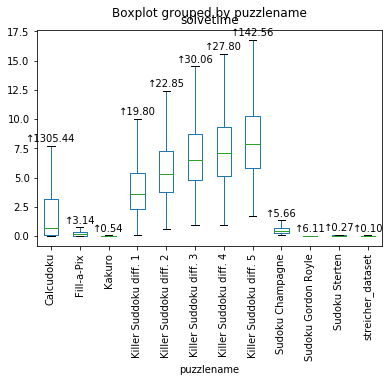

In [11]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
bplt = p_cnct.boxplot(by='puzzlename', column='solvetime', grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt)

plt.savefig("output/figs/all_output.svg", format="svg")

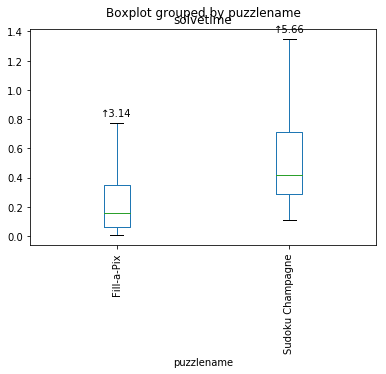

In [12]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
p_cnct = p_cnct[(p_cnct.puzzlename.str.contains("Pix") |
                 #p_cnct.puzzlename.str.contains("kuro") |
                 p_cnct.puzzlename.str.contains("Champ")).astype('bool')]

bplt = p_cnct.boxplot(by='puzzlename', column='solvetime', grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt)

plt.savefig("output/figs/fill-champ.svg", format="svg")

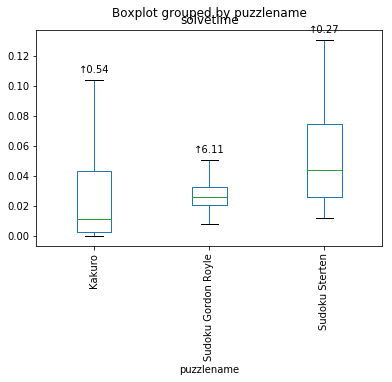

In [13]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
p_cnct = p_cnct[(p_cnct.puzzlename.str.contains("Sterten") |
                 p_cnct.puzzlename.str.contains("Kak") |
                 #p_cnct.puzzlename.str.contains("streicher") |
                 p_cnct.puzzlename.str.contains("Sudoku Gordon")
                ).astype('bool')]

bplt = p_cnct.boxplot(by='puzzlename', column='solvetime', grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt)

plt.savefig("output/figs/lils.svg", format="svg")

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  


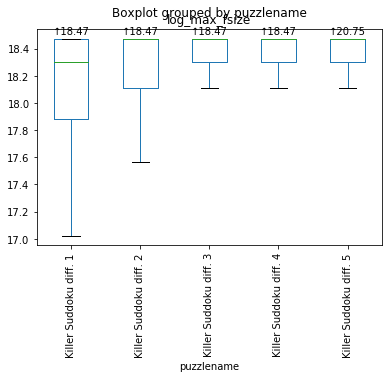

In [14]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
p_cnct['log_max_fsize'] = np.log2(p_cnct.max_fsize)

p_cnct = p_cnct[(p_cnct.puzzlename.str.contains("Killer")).astype('bool')]


bplt = p_cnct.boxplot(by='puzzlename', column=['log_max_fsize'], grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt, 'log_max_fsize')

plt.savefig("output/figs/kakuro--size.svg", format="svg")

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  


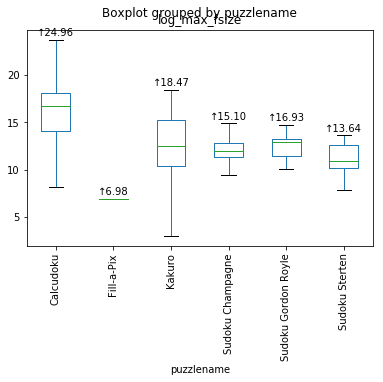

In [17]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
p_cnct['log_max_fsize'] = np.log2(p_cnct.max_fsize)

p_cnct = p_cnct[(p_cnct.puzzlename.str.contains("Pix") |
                 p_cnct.puzzlename.str.contains("Cal") |
                 p_cnct.puzzlename.str.contains("Champ")|
                 p_cnct.puzzlename.str.contains("Sterten") |
                 p_cnct.puzzlename.str.contains("Kak") |
                 p_cnct.puzzlename.str.contains("Sudoku Gor")
                ).astype('bool')]

bplt = p_cnct.boxplot(by='puzzlename', column='log_max_fsize', grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt, 'log_max_fsize')

plt.savefig("output/figs/fill-champ--size.svg", format="svg")

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  


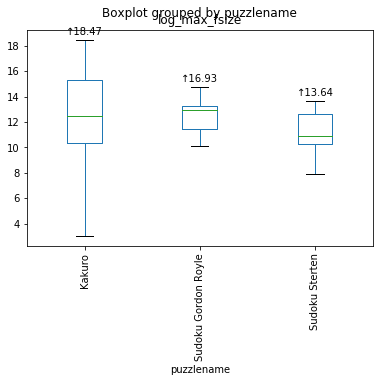

In [16]:
p_cnct = pd.concat(ppp, ignore_index=True, sort=False)
p_cnct['log_max_fsize'] = np.log2(p_cnct.max_fsize)

p_cnct = p_cnct[(p_cnct.puzzlename.str.contains("Sterten") |
                 p_cnct.puzzlename.str.contains("Kak") |
                 p_cnct.puzzlename.str.contains("Sudoku Gor")).astype('bool')]

bplt = p_cnct.boxplot(by='puzzlename', column='log_max_fsize', grid=False, showfliers=False, rot=90)
 
add_maxlabels(p_cnct, bplt, 'log_max_fsize')

plt.savefig("output/figs/lils--size.svg", format="svg")

In [64]:
20.9/(np.array([31.115, 33.650]))

array([0.67170175, 0.62109955])

In [65]:
p_gord = p_cnct[p_cnct.puzzlename.str.contains("Gordon")]

In [70]:
np.max(p_gord.solvetime)*3

18.32274